In [46]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

sns.set()

In [2]:
train_transform = transforms.Compose([
    transforms.RandomRotation(degrees=(-20, 20)),
    transforms.ColorJitter(brightness=0.5, contrast=0, saturation=0, hue=0),
    transforms.Grayscale(),
    transforms.Resize(size=(32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(.5,), std=(.5,))
])

test_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize(size=(32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(.5,), std=(.5,))
])

In [3]:
train_dataset = torchvision.datasets.GTSRB(root='./data', split='train', download=True, transform=train_transform)
test_dataset = torchvision.datasets.GTSRB(root='./data', split='test', download=True, transform=test_transform)

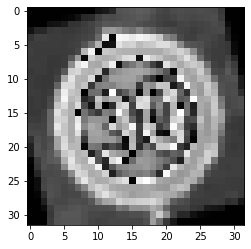

In [4]:
plt.imshow(transforms.ToPILImage()(train_dataset[500][0]), cmap='gray')
plt.grid(False)

In [41]:
def get_targets_tensor(dataset):

    targets = torch.zeros(len(dataset))

    for i in range(len(dataset)):

        _, label = dataset[i]
        targets[i] = label
    
    return targets

In [42]:
targets = get_targets_tensor(train_dataset)
classes, counts = targets.unique(return_counts=True)

In [43]:
classes

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42.])

In [44]:
counts

tensor([ 150, 1500, 1500,  960, 1320, 1260,  300,  960,  960,  990, 1350,  900,
        1410, 1440,  540,  420,  300,  750,  810,  150,  240,  240,  270,  360,
         180, 1020,  420,  180,  360,  180,  300,  540,  180,  480,  300,  810,
         270,  150, 1380,  210,  240,  180,  180])

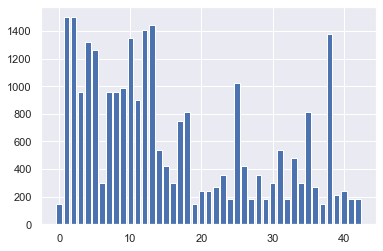

In [39]:
num_classes = len(counts)

plt.bar(x=np.arange(num_classes), height=counts)
plt.show()

Dataset is imbalanced

In [45]:
weights = 1 / counts
weights

tensor([0.0067, 0.0007, 0.0007, 0.0010, 0.0008, 0.0008, 0.0033, 0.0010, 0.0010,
        0.0010, 0.0007, 0.0011, 0.0007, 0.0007, 0.0019, 0.0024, 0.0033, 0.0013,
        0.0012, 0.0067, 0.0042, 0.0042, 0.0037, 0.0028, 0.0056, 0.0010, 0.0024,
        0.0056, 0.0028, 0.0056, 0.0033, 0.0019, 0.0056, 0.0021, 0.0033, 0.0012,
        0.0037, 0.0067, 0.0007, 0.0048, 0.0042, 0.0056, 0.0056])

In [51]:
sampler = torch.utils.data.WeightedRandomSampler(
    weights=weights[targets.long()],
    num_samples=num_classes,
    replacement=True,
    generator=torch.Generator()
)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=16, sampler=sampler)